## Ejercicio de estudio: respuesta a sorting en numpy 

Este ejercicio/respuesta lo agregamos para responder algunas dudas que aparecieron en Discord sobre como funciona sort en numpy, y algunos cuidados que hay que tener. Además de pasarles algunos trucos. 

El sort mas simple tanto en Python como en Numpy funciona en forma similar. En arrays 1D no hay complicaciones. 

El sort de arrays 2D, funciona de la misma manera, pero tenemos dos ejes sobre los cuales hacer el ordenamiento. Ordenamos de izquierda a derecha. O de arriba hacia abajo. 

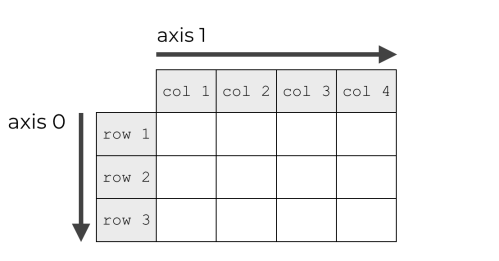

Referencias, ver [Sorting Arrays by Jacob Vanderplas](https://jakevdp.github.io/PythonDataScienceHandbook/02.08-sorting.html)



### Sorting básico

Dado este array (ver abajo), cuales son las diferencias entre estas maneras de ordenar?

*   `np.sort(a)`
*   `np.sort(a, axis=0)`
*   `np.sort(a, axis=1)`



In [136]:
import numpy as np 
a = np.array([[99, 21, 33],
           [44, 55, 66],
           [71, 8, 53]])

# Veamos el array original 
print("original: \n", a, "\n")

ordenado = np.sort(a) 
print("sort a secas: \n", ordenado, "\n")


original: 
 [[99 21 33]
 [44 55 66]
 [71  8 53]] 

sort a secas: 
 [[21 33 99]
 [44 55 66]
 [ 8 53 71]] 



In [7]:
# ordenar en el eje 0
ordenado = np.sort(a, axis=0)
print("sort ordenando explicitamente en un eje: \n", ordenado)

sort ordenando explicitamente en un eje: 
 [[44  0 33]
 [71 21 53]
 [99 55 66]] 



In [10]:
# ordenar en el eje 1
ordenado = np.sort(a, axis=1)
print("sort ordenando explicitamente en el otro eje: \n", ordenado)

sort ordenando explicitamente en el otro eje: 
 [[21 33 99]
 [44 55 66]
 [ 8 53 71]]


## arrays estructurados o argsort?

El problema con los sorts anteriores es que numpy trata a cada fila o columna como un sub-array 1D independiente. Por lo tanto, las relaciones entre filas y columnas se pierden. Ej si las filas son personas y las columnas son pesos y alturas, al ordenar en el eje 0 o 1 se pierde el alineamiento de peso-altura para cada persona. 

Una manera de solucionar esto, es hacer que el array de numpy sea *estructurado* y tenga nombres para cada columna. Con esas etiquetas el sort funciona como esperamos intuitivamente. Ya sabemos hacer un array estructurado, lo hicimos en clase con datos de alumnos (nombre, apellido, comision, nota).

### Un desvio en el camino: ejercicio

Para los datos de pesos y alturas de personas, crear un array estructurado de numpy y aplicar la función `np.sort()` para ordenar el array por altura o por peso. 

```
# altura en metros de personas
alturas = [1.73, 1.68, 1.71, 1.89, 1.79, 1.76, 1.67]
# peso en Kg de personas
pesos = [65.4, 59.2, 63.6, 88.4, 68.7, 89.7, 73.2]
```




In [ ]:
#@title Solucion al desvio 
# respuesta al desvio 

# altura en metros de personas
alturas = [1.73, 1.68, 1.71, 1.89, 1.79, 1.76, 1.67]
# peso en Kg de personas
pesos = [65.4, 59.2, 63.6, 88.4, 68.7, 89.7, 73.2]

# for loop para armar pares altura-peso para despues armar el array
persona = 0
datos_personas = []
for alt in alturas:
    datos_personas.append((alt,pesos[persona]))
    persona += 1

# array estructurado 
tipo_de_datos = [('altura', float), ('peso', float)]
personas= np.array(datos_personas, dtype=tipo_de_datos)
print("Array estructurado:\n", personas, "\n")

# sorting por peso 
print(np.sort(personas, order="peso"), "\n")

# sorting por altura
print(np.sort(personas, order="altura"))

### Seguimos ...

Si no usamos arrays con etiquetas de columnas, otra manera de ordenar arrays completamente numéricos, es usar `np.argsort()`, que nos devuelve los índices ordenados de alguna fila o columna. Y acá viene el **truco**. Vayamos por partes. 

Primero: sabian que pueden ordenar arrays de numpy a mano? Como es eso? Veamos: 

In [118]:
a = np.array([71,63,75])

# sabemos como tomar un solo valor del array
print(a[0])

# sabemos como tomar un rango de valores del array
print(a[0:2])

# sabemos como tomar una lista de valores individuales del array?
# es decir: sin usar un rango? por ejemplo el primer y ultimo elemento?
# si, sabemos
print(a[ [0,2] ])

# entonces podriamos ordenar el array?
# por ejemplo asi? 
print(a[ [1,0,2] ])

# claro que podemos!

71
[71 63]
[71 75]
[63 71 75]


In [24]:
# esto es lo mismo que hacerlo asi
a = np.array([71,63,75])
indices_ordenados_de_a = np.array([1,0,2])

a_ordenado = a[ indices_ordenados_de_a ]
print(a_ordenado)

[63 71 75]


Entonces, veamos como nos puede ayudar `argsort()`. Esta función lo que nos devuelve es **justamente** la lista de índices *ordenados* del input. 

Les dejo la [documentación sobre argsort().](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) A continuación veamos como funciona: 

In [12]:
# array 1D simple
#              0   1   2   3   4   5   6   7   8   <--- indices
b = np.array([99, 33, 66, 55, 77, 22, 11, 88, 44])

# que me da como resultado argsort()?
np.argsort(b)

array([6, 5, 1, 8, 3, 2, 4, 7, 0])

In [25]:
# entonces para ordenar b
b_ordenado = b[ np.argsort(b) ]
print(b_ordenado)

[11 22 33 44 55 66 77 88 99]


## Ordenando arrays 2D 

Como sería entonces ordenar un array 2D usando `argsort()`? Esto es un poco mas complejo, por las dimensiones, pero la idea es la misma. 

In [126]:
# respuesta
a = np.array([[ 99, 21, 33 ],[ 44, 55, 66 ], [ 71,  0, 53 ]])
print("Array original:\n", a, "\n")

# ordenamos por la 1er columna 
print("Array ordenado 1C:\n", a[ np.argsort(a[:,0]), : ])

# ordenamos por la 2nda columna 
print("Array ordenado 2C:\n", a[ np.argsort(a[:,1]), : ])

# ordenamos por la 3er columna 
print("Array ordenado 3C:\n", a[ np.argsort(a[:,2]), : ])

Array original:
 [[99 21 33]
 [44 55 66]
 [71  0 53]] 

Array ordenado 1C:
 [[44 55 66]
 [71  0 53]
 [99 21 33]]
Array ordenado 2C:
 [[71  0 53]
 [99 21 33]
 [44 55 66]]
Array ordenado 3C:
 [[99 21 33]
 [71  0 53]
 [44 55 66]]


In [127]:
# y por filas? 

# ordenando por 1er fila
print("Ordenado por 1F:\n", a[ :, a[0].argsort() ])

# ordenando por 2da fila
print("Ordenado por 2F:\n", a[ :, a[1].argsort() ])

# ordenando por 3er fila
print("Ordenado por 3F:\n", a[ :, a[2].argsort() ])


Ordenado por 1F:
 [[21 33 99]
 [55 66 44]
 [ 0 53 71]]
Ordenado por 2F:
 [[99 21 33]
 [44 55 66]
 [71  0 53]]
Ordenado por 3F:
 [[21 33 99]
 [55 66 44]
 [ 0 53 71]]


## Ejercicio 

Volvemos a los datos de pesos y alturas. Ahora, podemos ordenar los datos por peso (o altura) y mantener los pares peso-altura de cada persona, sin hacer un array estructurado, y usando `argsort()`?


In [26]:
# altura en metros de personas
alturas = [1.73, 1.68, 1.71, 1.89, 1.79, 1.76, 1.67]
# peso en Kg de personas
pesos = [65.4, 59.2, 63.6, 88.4, 68.7, 89.7, 73.2]

# ap es el array de pesos y alturas 
ap = np.array([ alturas, pesos ])
print("original: \n", ap, "\n")

original: 
 [[ 1.73  1.68  1.71  1.89  1.79  1.76  1.67]
 [65.4  59.2  63.6  88.4  68.7  89.7  73.2 ]] 



In [134]:
#       0     1     2     3     4     5     6     <--- Columnas
#  [[ 1.73  1.68  1.71  1.89  1.79  1.76  1.67]]   --- Fila 0
#  [[65.4  59.2  63.6  88.4  68.7  89.7  73.2 ]]]  --- Fila 1

# obtengo los indices ordenados usando argsort()
indices_ordenados_alturas = ap[0,:].argsort()
indices_ordenados_pesos   = ap[1,:].argsort() 
print("Alturas ordenadas (indices): \n", indices_ordenados_alturas )
print("Pesos ordenados (indices): \n", indices_ordenados_pesos )

# ahora ordenamos el array usando estos indices ordenados
# por altura
personas_ordenadas_por_altura = ap[ :, indices_ordenados_alturas ]
print("Ordenadas por altura:\n", personas_ordenadas_por_altura)

# por peso 
personas_ordenadas_por_peso = ap[ :, indices_ordenados_pesos ]
print("Ordenadas por peso:\n", personas_ordenadas_por_peso)


# notar que hay varias maneras de hacer lo mismo usen la que les resulte mas clara
# o facil de leer/entender
# personas_ordenadas_por_peso = ap[ :, ap[1,:].argsort() ]
# o 
# personas_ordenadas_por_peso = ap[ :, np.argsort(ap[1,:]) ]
# o 
# indices_ordenados = np.argsort(ap[1,:]) 
# array_ordenado = ap[ :, indices_ordenados ]
# se entiende la idea ... espero!




Alturas ordenadas (indices): 
 [6 1 2 0 5 4 3]
Pesos ordenados (indices): 
 [1 2 0 4 6 3 5]
Ordenadas por altura:
 [[ 1.67  1.68  1.71  1.73  1.76  1.79  1.89]
 [73.2  59.2  63.6  65.4  89.7  68.7  88.4 ]]
Ordenadas por peso:
 [[ 1.68  1.71  1.73  1.79  1.67  1.89  1.76]
 [59.2  63.6  65.4  68.7  73.2  88.4  89.7 ]]
